# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Attiya Dianti Fadli
- **Email:** attiyadiantifadli@gmail.com
- **ID Dicoding:** MC189D5X0806

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda pada hari kerja dibandingkan akhir pekan?
- Jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Insight:**
- pandas, digunakan untuk manipulasi dan analisis data berbasis tabel (DataFrame).
- numpy, digunakan untuk operasi komputasi numerik, seperti array multidimensi dan fungsi matematika.
- matplotlib.pyplot, digunakan untuk membuat visualisasi grafik dasar dalam Python.
- seaborn, pustaka yang berbasis matplotlib, digunakan untuk membuat visualisasi statistik yang lebih menarik dan informatif.

In [92]:
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [93]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


**Insight:**
1. from google.colab import files; Mengimpor modul files dari Google Colab, yang memungkinkan interaksi dengan sistem file lokal.
2. uploaded = files.upload(); Membuka dialog unggahan file di Colab, memungkinkan pengguna memilih file dari komputer lokal. Dan file yang diunggah akan disimpan dalam memori Colab sebagai objek dictionary dengan nama file sebagai key dan isi file sebagai value dalam format bytes.

In [94]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

**Insight:**
- Membaca file day.csv dan file hour.csv kemudian menyimpannya dalam variabel day_df dan hour_df.

### Assessing Data

Menilai tabel df_day

In [95]:
# Melihat 5 data pertama
print("\n Data Harian (day.csv):")
day_df.head()


 Data Harian (day.csv):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [96]:
# Melihat informasi umum dataset
print("\n Informasi Data Harian:")
day_df.info()


 Informasi Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [97]:
# Melihat statistik ringkasan
print("\n Statistik Data Harian:")
day_df.describe()


 Statistik Data Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [98]:
# Mengecek missing values
print("\n Missing Values Data Harian:")
print(day_df.isnull().sum())


 Missing Values Data Harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [99]:
# Mengecek duplikasi
print("\n Jumlah Duplikasi Data Harian:", day_df.duplicated().sum())


 Jumlah Duplikasi Data Harian: 0


**Insight dari Data Harian (day_df)**

*1. Struktur Data*
- Dataset ini memiliki **731 baris dan 16 kolom**.
- Tidak ada **missing values**, sehingga data cukup bersih.
- Tidak ditemukan **duplikasi data**, sehingga tidak perlu pembersihan lebih lanjut.

*2. Statistik Deskriptif*
- **Jumlah Penyewaan Sepeda (`cnt`)**
  - Rata-rata jumlah penyewaan sepeda per hari adalah **4.504**.
  - Jumlah minimum penyewaan hanya **22**, sedangkan jumlah maksimum mencapai **8.714**.
  - Sebaran data cukup besar, terlihat dari standar deviasi sekitar **1.937**.

- **Variabel Cuaca**
  - Suhu (`temp`) berkisar antara **0.06 - 0.86** dalam skala normalisasi.
  - Kelembaban (`hum`) memiliki nilai minimum **0.00**, yang bisa menjadi indikasi data outlier atau kesalahan pencatatan.
  - Kecepatan angin (`windspeed`) maksimum tercatat **0.50**, yang masih dalam batas wajar.

- **Hari Libur & Hari Kerja**
  - Kolom `holiday` dan `workingday` menunjukkan hari kerja dan libur, yang bisa dianalisis lebih lanjut untuk melihat pengaruhnya terhadap jumlah penyewaan.

*3. Interpretasi Awal*
- Tidak ada missing values atau duplikasi, sehingga dataset dapat langsung digunakan untuk analisis.
- Perlu analisis lebih lanjut apakah **jumlah penyewaan dipengaruhi oleh faktor cuaca**, hari kerja, atau musim (`season`).
- Kemungkinan terdapat outlier pada kolom kelembaban (`hum`) yang memiliki nilai **0.00**.


Melihat Tabel df_hour


In [100]:
# Melihat 5 data pertama
print("\n Data Per Jam (hour.csv):")
hour_df.head()


 Data Per Jam (hour.csv):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [101]:
# Melihat informasi umum dataset
print("\n Informasi Data Per Jam:")
hour_df.info()


 Informasi Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [102]:
# Melihat statistik ringkasan
print("\n Statistik Data Per Jam:")
hour_df.describe()


 Statistik Data Per Jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [103]:
# Mengecek missing values
print("\n Missing Values Data Per Jam:")
print(hour_df.isnull().sum())


 Missing Values Data Per Jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [104]:
# Mengecek duplikasi
print("Jumlah Duplikasi Data Per Jam:", hour_df.duplicated().sum())

Jumlah Duplikasi Data Per Jam: 0


**Insight dari Data Per Jam (hour_df)**

*1. Struktur Data*
- Dataset ini memiliki **17.379 baris dan 17 kolom**.
- **Tidak ada missing values**, sehingga tidak diperlukan imputasi data.
- **Tidak ditemukan duplikasi data**, sehingga tidak perlu dilakukan pembersihan lebih lanjut.

*2. Statistik Deskriptif*
- **Jumlah Penyewaan Sepeda (`cnt`)**
  - Rata-rata jumlah penyewaan sepeda per jam adalah **189**.
  - Penyewaan minimum hanya **1**, sedangkan maksimum mencapai **977**.
  - Standar deviasi sekitar **181**, menunjukkan variasi yang cukup besar dalam jumlah penyewaan setiap jamnya.

- **Variabel Waktu**
  - Dataset mencakup rentang waktu per jam (`hr`) dari **00:00 hingga 23:00** setiap hari.
  - Rata-rata jam tercatat sekitar **11.5**, menunjukkan distribusi data merata antara pagi dan malam.

- **Variabel Cuaca**
  - Suhu (`temp`) berkisar antara **0.02 - 1.00** dalam skala normalisasi.
  - Kelembaban (`hum`) dan kecepatan angin (`windspeed`) juga memiliki sebaran yang cukup lebar.

- **Pengguna Casual vs Registered**
  - Rata-rata penyewaan oleh pengguna **casual** adalah **35**, sedangkan **registered** adalah **153**.
  - Jumlah penyewaan oleh pengguna **terdaftar (registered)** jauh lebih tinggi dibandingkan dengan pengguna **casual**, menunjukkan bahwa sebagian besar pelanggan adalah pelanggan tetap.

*3. Interpretasi Awal*
- Dataset ini **lebih besar** dibandingkan `day_df` karena memiliki data per jam, sehingga lebih rinci dalam analisis tren waktu.
- **Tidak ada missing values dan duplikasi**, sehingga bisa langsung digunakan untuk eksplorasi lebih lanjut.
- Perlu dilakukan **analisis tren berdasarkan jam**, misalnya kapan penyewaan mencapai puncaknya.
- **Perbedaan jumlah penyewaan antara pengguna casual dan registered** dapat dianalisis lebih lanjut untuk memahami pola perilaku pengguna.


### Cleaning Data

Cleaning data df_day


In [105]:
# Menghapus duplikasi jika ada
day_df.drop_duplicates(inplace=True)
print("Jumlah Duplikasi Data Harian Setelah Dihapus:", day_df.duplicated().sum())

Jumlah Duplikasi Data Harian Setelah Dihapus: 0


In [106]:
# Mengubah type data tanggal menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
print("\nTipe data setelah Cleaning Data (day_df):\n", day_df.dtypes)


Tipe data setelah Cleaning Data (day_df):
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [107]:
# Mengubah variabel season menjadi kategori
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [108]:
# Menghapus kolom yang tidak diperlukan (opsional)
# Misalnya, kita bisa menghapus kolom 'instant' karena tidak terlalu berguna
day_df.drop(columns=["instant"], inplace=True)

In [109]:
# Menampilkan hasil akhir setelah cleaning
print("Data Harian Setelah di cleaning:", day_df.shape)

Data Harian Setelah di cleaning: (731, 15)


In [110]:
# Cek apakah ada nilai negatif atau nol pada kolom yang seharusnya positif di Data Harian
num_cols_day = ["cnt", "temp", "atemp", "hum", "windspeed"]
for col in num_cols_day:
    print(f"\nCek Nilai Minimum pada {col} di Data Harian (Sebelum Dihapus): {day_df[col].min()}")

# Menghapus baris dengan nilai negatif pada Data Harian
for col in num_cols_day:
    day_df = day_df[day_df[col] >= 0]

# Menangani nilai 0 pada kelembaban (hum) dan kecepatan angin (windspeed)
day_hum_outlier = day_df[day_df["hum"] == 0].shape[0]
day_wind_outlier = day_df[day_df["windspeed"] == 0].shape[0]

day_df = day_df[day_df["hum"] > 0]
day_df = day_df[day_df["windspeed"] > 0]

# Menampilkan jumlah data yang dihapus
print("\nJumlah Data yang Dihapus di Data Harian:")
print(f"- {day_hum_outlier} baris (kelembaban = 0)")
print(f"- {day_wind_outlier} baris (windspeed = 0)")

# Menampilkan jumlah data setelah pembersihan
print("\nData Harian Setelah Menghapus Nilai Tidak Valid:", day_df.shape)


Cek Nilai Minimum pada cnt di Data Harian (Sebelum Dihapus): 22

Cek Nilai Minimum pada temp di Data Harian (Sebelum Dihapus): 0.0591304

Cek Nilai Minimum pada atemp di Data Harian (Sebelum Dihapus): 0.0790696

Cek Nilai Minimum pada hum di Data Harian (Sebelum Dihapus): 0.0

Cek Nilai Minimum pada windspeed di Data Harian (Sebelum Dihapus): 0.0223917

Jumlah Data yang Dihapus di Data Harian:
- 1 baris (kelembaban = 0)
- 0 baris (windspeed = 0)

Data Harian Setelah Menghapus Nilai Tidak Valid: (730, 15)


In [111]:
# Fungsi untuk mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Kolom numerik yang dicek outlier
num_cols = ["cnt", "temp", "atemp", "hum", "windspeed"]

# Mendeteksi dan menghapus outlier dari data harian
day_df_cleaned = remove_outliers_iqr(day_df, num_cols)
print("\n Data Harian Setelah Menghapus Outlier:", day_df_cleaned.shape)


 Data Harian Setelah Menghapus Outlier: (717, 15)


**Insight dari Cleaning Data Harian (day_df)**

*1. Duplikasi Data*
- Setelah proses pembersihan, jumlah duplikasi dalam data harian adalah **0**.
- Tidak ada baris yang perlu dihapus akibat duplikasi.

*2. Perubahan Tipe Data*
- Tipe data `dteday` telah dikonversi ke **datetime** untuk mempermudah analisis berbasis waktu.
- Kolom lainnya tetap sesuai dengan tipe data yang diperlukan, seperti **int64** untuk variabel kategori dan **float64** untuk variabel numerik.

*3. Pembersihan Data*
- **Sebelum pembersihan**, dataset berisi **731 baris dan 15 kolom**.
- Beberapa nilai minimum yang mencurigakan ditemukan:
  - **cnt (jumlah penyewaan sepeda):** 22 (valid)
  - **temp (suhu):** 0.0591 (valid)
  - **atemp (suhu yang dirasakan):** 0.0791 (valid)
  - **hum (kelembaban):** **0.0** (tidak valid)
  - **windspeed (kecepatan angin):** 0.0224 (valid)

- **Jumlah data yang dihapus:**
  - **1 baris** dihapus karena kelembaban (`hum`) = 0, yang dianggap sebagai data tidak valid.
  - **0 baris** dihapus karena kecepatan angin (`windspeed`) masih dalam batas wajar.

- Setelah pembersihan nilai tidak valid, jumlah data menjadi **730 baris**.

*4. Menghapus Outlier*
- Untuk meningkatkan kualitas data, outlier juga dihapus berdasarkan distribusi data.
- Setelah menghapus outlier, jumlah data akhir menjadi **717 baris dan 15 kolom**.

Cleaning data df_hour

In [112]:
# Menghapus duplikasi jika ada
hour_df.drop_duplicates(inplace=True)
print("Jumlah Duplikasi Data Per Jam Setelah Dihapus:", hour_df.duplicated().sum())

Jumlah Duplikasi Data Per Jam Setelah Dihapus: 0


In [113]:
# Mengubah type data tanggal menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print("\nTipe data setelah Cleaning Data (hour_df):\n", hour_df.dtypes)


Tipe data setelah Cleaning Data (hour_df):
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [114]:
# Mengubah variabel season menjadi kategori
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [115]:
# Menghapus kolom yang tidak diperlukan (opsional)
# Misalnya, kita bisa menghapus kolom 'instant' karena tidak terlalu berguna
hour_df.drop(columns=["instant"], inplace=True)

In [116]:
# Menampilkan hasil akhir setelah cleaning
print("Data Per Jam setelah di cleaning:", hour_df.shape)

Data Per Jam setelah di cleaning: (17379, 16)


In [117]:
# Cek apakah ada nilai negatif atau nol pada kolom yang seharusnya positif di Data Per Jam
num_cols_hour = ["cnt", "temp", "atemp", "hum", "windspeed"]
for col in num_cols_hour:
    print(f"\nCek Nilai Minimum pada {col} di Data Per Jam (Sebelum Dihapus): {hour_df[col].min()}")

# Menghapus baris dengan nilai negatif pada Data Per Jam
for col in num_cols_hour:
    hour_df = hour_df[hour_df[col] >= 0]

# Menangani nilai 0 pada kelembaban (hum) dan kecepatan angin (windspeed)
hour_hum_outlier = hour_df[hour_df["hum"] == 0].shape[0]
hour_wind_outlier = hour_df[hour_df["windspeed"] == 0].shape[0]

hour_df = hour_df[hour_df["hum"] > 0]
hour_df = hour_df[hour_df["windspeed"] > 0]

# Menampilkan jumlah data yang dihapus
print("\nJumlah Data yang Dihapus di Data Per Jam:")
print(f"- {hour_hum_outlier} baris (kelembaban = 0)")
print(f"- {hour_wind_outlier} baris (windspeed = 0)")

# Menampilkan jumlah data setelah pembersihan
print("\nData Per Jam Setelah Menghapus Nilai Tidak Valid:", hour_df.shape)


Cek Nilai Minimum pada cnt di Data Per Jam (Sebelum Dihapus): 1

Cek Nilai Minimum pada temp di Data Per Jam (Sebelum Dihapus): 0.02

Cek Nilai Minimum pada atemp di Data Per Jam (Sebelum Dihapus): 0.0

Cek Nilai Minimum pada hum di Data Per Jam (Sebelum Dihapus): 0.0

Cek Nilai Minimum pada windspeed di Data Per Jam (Sebelum Dihapus): 0.0

Jumlah Data yang Dihapus di Data Per Jam:
- 22 baris (kelembaban = 0)
- 2180 baris (windspeed = 0)

Data Per Jam Setelah Menghapus Nilai Tidak Valid: (15177, 16)


In [118]:
# Fungsi untuk mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Kolom numerik yang dicek outlier
num_cols = ["cnt", "temp", "atemp", "hum", "windspeed"]

# Mendeteksi dan menghapus outlier dari data per jam
hour_df_cleaned = remove_outliers_iqr(hour_df, num_cols)
print("\n Data Per Jam Setelah Menghapus Outlier:", hour_df_cleaned.shape)


 Data Per Jam Setelah Menghapus Outlier: (14516, 16)


**Insight dari Cleaning Data Per Jam (hour_df)**

*1. Duplikasi Data*
- Setelah dilakukan pengecekan, **tidak ada duplikasi data** dalam dataset per jam (`hour_df`).

*2. Tipe Data Setelah Cleaning*
- Semua tipe data sudah sesuai, termasuk:
  - **Kolom waktu (`dteday`)** yang telah dikonversi ke format **datetime**.
  - **Kolom numerik** seperti `temp`, `atemp`, `hum`, dan `windspeed` bertipe **float64**.
  - **Kolom kategori** seperti `season`, `yr`, `mnth`, `hr`, dan lainnya bertipe **int64**.

*3. Ukuran Dataset*
- Sebelum pembersihan, jumlah data per jam adalah **17.379 baris dan 16 kolom**.
- Setelah pembersihan, jumlah data berkurang menjadi **14.516 baris dan 16 kolom**, menunjukkan bahwa ada beberapa data yang dihapus untuk meningkatkan kualitas analisis.

*4. Pengecekan Nilai Minimum*
- Beberapa variabel memiliki nilai **0.0**, yang mungkin tidak masuk akal dalam konteks data cuaca:
  - **cnt (jumlah penyewaan)**: Minimum = **1** (valid).
  - **temp (suhu)**: Minimum = **0.02** (valid).
  - **atemp (suhu terasa)**: Minimum = **0.0** (perlu dicek lebih lanjut).
  - **hum (kelembaban)**: Minimum = **0.0** (kemungkinan tidak valid).
  - **windspeed (kecepatan angin)**: Minimum = **0.0** (kemungkinan tidak valid).

*5. Pembersihan Data*
- **Data yang dihapus** karena memiliki nilai yang tidak valid:
  - **22 baris dengan kelembaban (`hum`) = 0.0**.
  - **2.180 baris dengan kecepatan angin (`windspeed`) = 0.0**.
  - Setelah menghapus data tidak valid, jumlah data menjadi **15.177 baris**.

*6. Menghapus Outlier*
- Setelah proses pembersihan tambahan untuk outlier, jumlah data akhirnya menjadi **14.516 baris**.
- Dengan demikian, dataset ini kini lebih bersih dan siap untuk analisis lebih lanjut.


In [119]:
# Menyimpan Data Harian yang Sudah Dibersihkan ke CSV
day_df.to_csv("day_cleaned.csv", index=False)
hour_df.to_csv("hour_cleaned.csv", index=False)

**Insight:**
- Setelah proses cleaning data, langkah terakhir adalah menyimpan dataset yang sudah bersih ke dalam file CSV agar dapat digunakan kembali tanpa perlu mengulangi proses pembersihan. karena dataset yang sudah bersih bisa digunakan kembali untuk analisis lebih lanjut atau modeling dan menghemat waktu karena tidak perlu membersihkan data dari awal setiap kali ingin menggunakannya.

## Exploratory Data Analysis (EDA)

### Explore ...

Explore day_df

In [120]:
# Menyimpan hasil cleaning ke variabel baru
day_df_clean = day_df.copy()

# Menampilkan sampel data harian
print("\n Sample Data Harian:")
print(day_df_clean.sample(5))


 Sample Data Harian:
        dteday season  yr  mnth  holiday  weekday  workingday weathersit  \
203 2011-07-23      3   0     7        0        6           0          1   
361 2011-12-28      1   0    12        0        3           1          1   
536 2012-06-20      2   1     6        0        3           1          1   
700 2012-12-01      4   1    12        0        6           0          2   
5   2011-01-06      1   0     1        0        4           1          1   

         temp     atemp       hum  windspeed  casual  registered   cnt  
203  0.849167  0.804287  0.500000   0.131221     987        2298  3285  
361  0.299130  0.279974  0.503913   0.293961     255        2047  2302  
536  0.782500  0.720975  0.592083   0.113812     872        5339  6211  
700  0.298333  0.316904  0.806667   0.059704     951        4240  5191  
5    0.204348  0.233209  0.518261   0.089565      88        1518  1606  


In [121]:
# Menampilkan statistik deskriptif data harian
print("\n Statistik Deskriptif Data Harian:")
print(day_df_clean.describe(include="all"))


 Statistik Deskriptif Data Harian:
                               dteday  season          yr        mnth  \
count                             730   730.0  730.000000  730.000000   
unique                            NaN     4.0         NaN         NaN   
top                               NaN     3.0         NaN         NaN   
freq                              NaN   188.0         NaN         NaN   
mean    2012-01-01 09:45:51.780822016     NaN    0.501370    6.524658   
min               2011-01-01 00:00:00     NaN    0.000000    1.000000   
25%               2011-07-03 06:00:00     NaN    0.000000    4.000000   
50%               2012-01-01 12:00:00     NaN    1.000000    7.000000   
75%               2012-07-01 18:00:00     NaN    1.000000   10.000000   
max               2012-12-31 00:00:00     NaN    1.000000   12.000000   
std                               NaN     NaN    0.500341    3.451815   

           holiday     weekday  workingday  weathersit        temp  \
count   730.00000

In [122]:
# Analisis jumlah penyewaan berdasarkan musim
print("\n Rata-rata Penyewaan Sepeda Berdasarkan Musim (Harian):")
print(day_df_clean.groupby("season", observed=True)["cnt"].agg(["count", "mean", "max", "min"]))


 Rata-rata Penyewaan Sepeda Berdasarkan Musim (Harian):
        count         mean   max   min
season                                
1         180  2615.138889  7836   431
2         184  4992.331522  8362   795
3         188  5644.303191  8714  1115
4         178  4728.162921  8555    22


In [123]:
# Analisis jumlah penyewaan berdasarkan hari kerja vs akhir pekan
print("\n Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (Harian):")
print(day_df_clean.groupby("workingday")["cnt"].agg(["count", "mean", "max", "min"]))


 Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (Harian):
            count         mean   max  min
workingday                               
0             231  4330.168831  8714  605
1             499  4592.759519  8362   22


**Insight Explore tabel day_df**

*1. Sampel Data Harian*
Dataset berisi informasi mengenai jumlah penyewaan sepeda berdasarkan faktor-faktor seperti tanggal, musim, hari kerja, cuaca, suhu, dan kecepatan angin. Berikut adalah contoh 5 sampel data dari dataset:

- Data mencakup berbagai musim dan kondisi cuaca.
- Rentang temperatur berkisar antara 0.21 hingga 0.71.
- Kecepatan angin bervariasi dari 0.08 hingga 0.16.
- Penyewaan sepeda harian tertinggi dalam sampel adalah **7.446** dan terendah **1.708**.


*2. Statistik Deskriptif Data Harian*
Dari statistik deskriptif dataset, kita bisa melihat beberapa poin penting:

- **Total Data**: 730 baris (setelah cleaning)
- **Rentang Waktu**: 1 Januari 2011 - 31 Desember 2012
- **Rata-rata Penyewaan Sepeda**: **4.509 sepeda per hari**
- **Jumlah Penyewa Tertinggi**: **8.714 sepeda dalam sehari**
- **Jumlah Penyewa Terendah**: **22 sepeda dalam sehari**
- **Rata-rata Suhu**: **0.49 (dikategorikan dalam skala 0-1)**

Tidak ada **missing values** atau duplikasi dalam dataset setelah proses pembersihan.


*3. Rata-rata Penyewaan Sepeda Berdasarkan Musim***
Jika dibandingkan berdasarkan musim, tren penyewaan sepeda menunjukkan pola berikut:

| Musim | Rata-rata Penyewaan | Maksimum | Minimum |
|--------|----------------------|----------|----------|
| Musim Dingin (1) | **2.615** | 7.836 | 431 |
| Musim Semi (2)  | **4.992** | 8.362 | 795 |
| Musim Panas (3) | **5.644** | 8.714 | 1.115 |
| Musim Gugur (4) | **4.728** | 8.555 | 22 |

- Penyewaan tertinggi terjadi di **musim panas** dengan rata-rata **5.644 sepeda/hari**.
- Penyewaan terendah terjadi di **musim dingin** dengan rata-rata **2.615 sepeda/hari**.
- Musim gugur juga menunjukkan angka penyewaan yang cukup tinggi, sedangkan musim semi berada di tengah.

*4. Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan*

| Hari Kerja | Rata-rata Penyewaan | Maksimum | Minimum |
|------------|----------------------|----------|----------|
| Akhir Pekan (0)  | **4.330** | 8.714 | 605 |
| Hari Kerja (1)  | **4.592** | 8.362 | 22 |

- **Penyewaan sepeda pada hari kerja lebih tinggi (4.592 sepeda/hari) dibandingkan akhir pekan (4.330 sepeda/hari)**.
- Ini menunjukkan bahwa banyak pengguna sepeda menggunakan layanan ini untuk bekerja atau aktivitas rutin.
- Pada akhir pekan, meskipun lebih sedikit dibandingkan hari kerja, jumlahnya masih cukup signifikan, menunjukkan adanya penggunaan rekreasi.

Explore tabel hour_df

In [124]:
# Menyimpan hasil cleaning ke variabel baru
hour_df_clean = hour_df.copy()

# Menampilkan sampel data per jam
print("\n Sample Data Per Jam:")
print(hour_df_clean.sample(5))


 Sample Data Per Jam:
          dteday season  yr  mnth  hr  holiday  weekday  workingday  \
10489 2012-03-18      1   1     3   4        0        0           0   
7787  2011-11-26      4   0    11   2        0        6           0   
11170 2012-04-15      2   1     4  15        0        0           0   
3548  2011-06-01      2   0     6  18        0        3           1   
3662  2011-06-06      2   0     6  12        0        1           1   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
10489          2  0.42  0.4242  0.94     0.1642       6           8   14  
7787           1  0.30  0.3182  0.81     0.1045       3          20   23  
11170          1  0.70  0.6364  0.39     0.3881     266         351  617  
3548           3  0.82  0.7879  0.56     0.3881      31         278  309  
3662           1  0.76  0.6667  0.37     0.1642      25         128  153  


In [125]:
# Menampilkan statistik deskriptif data per jam
print("\n Statistik Deskriptif Data Per Jam:")
print(hour_df_clean.describe(include="all"))


 Statistik Deskriptif Data Per Jam:
                               dteday   season            yr          mnth  \
count                           15177  15177.0  15177.000000  15177.000000   
unique                            NaN      4.0           NaN           NaN   
top                               NaN      2.0           NaN           NaN   
freq                              NaN   4012.0           NaN           NaN   
mean    2011-12-30 22:05:40.146273792      NaN      0.504777      6.436055   
min               2011-01-01 00:00:00      NaN      0.000000      1.000000   
25%               2011-06-29 00:00:00      NaN      0.000000      3.000000   
50%               2012-01-04 00:00:00      NaN      1.000000      6.000000   
75%               2012-06-27 00:00:00      NaN      1.000000      9.000000   
max               2012-12-31 00:00:00      NaN      1.000000     12.000000   
std                               NaN      NaN      0.499994      3.429693   

                  hr      

In [126]:
# Analisis jumlah penyewaan berdasarkan musim
print("\n Rata-rata Penyewaan Sepeda Berdasarkan Musim (Per Jam):")
print(hour_df_clean.groupby("season", observed=True)["cnt"].agg(["count", "mean", "max", "min"]))


 Rata-rata Penyewaan Sepeda Berdasarkan Musim (Per Jam):
        count        mean  max  min
season                             
1        3783  113.227333  801    1
2        4012  209.867896  957    1
3        3863  244.216412  977    1
4        3519  206.909918  967    1


In [127]:
# Analisis jumlah penyewaan berdasarkan hari kerja vs akhir pekan
print("\n Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (Per Jam):")
print(hour_df_clean.groupby("workingday")["cnt"].agg(["count", "mean", "max", "min"]))


 Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (Per Jam):
            count        mean  max  min
workingday                             
0            4851  184.670583  783    1
1           10326  198.142165  977    1


In [128]:
# Analisis jumlah penyewaan berdasarkan jam dalam sehari
print("\n Jumlah Penyewaan Sepeda Berdasarkan Jam dalam Sehari:")
print(hour_df_clean.groupby("season", observed=True)["cnt"].agg(["count", "mean", "max", "min"]))


 Jumlah Penyewaan Sepeda Berdasarkan Jam dalam Sehari:
        count        mean  max  min
season                             
1        3783  113.227333  801    1
2        4012  209.867896  957    1
3        3863  244.216412  977    1
4        3519  206.909918  967    1


**Insight Explore Tabel hour_df**  

*1. Sample Data Per Jam*<br>
Dataset ini berisi data penyewaan sepeda berdasarkan jam. Berikut adalah contoh 5 sampel data:  
- Data mencakup informasi seperti musim (season), tahun (yr), bulan (mnth), jam (hr), kondisi cuaca (weathersit), suhu (temp), kelembaban (hum), kecepatan angin (windspeed), serta jumlah pengguna casual, terdaftar (registered), dan total penyewa (cnt).  

*2. Statistik Deskriptif Data Per Jam*
- Dataset terdiri dari **15.177 baris** dengan variabel seperti tanggal, musim, hari libur, dan jam.  
- Rata-rata suhu tercatat **0.49 (skala 0-1)**, sedangkan rata-rata kelembaban **0.62**.  
- Nilai minimum jumlah penyewa sepeda dalam satu jam adalah **1 penyewa**, sedangkan maksimum adalah **977 penyewa**.  

*3. Penyewaan Sepeda Berdasarkan Musim*
- Penyewaan sepeda tertinggi terjadi pada musim panas (**mean: 244 penyewa/jam**).  
- Musim dengan penyewaan sepeda terendah adalah musim dingin (**mean: 113 penyewa/jam**).  

*4. Perbandingan Hari Kerja vs Akhir Pekan*
- Hari kerja memiliki rata-rata penyewaan lebih tinggi (**198 penyewa/jam**) dibanding akhir pekan (**184 penyewa/jam**).  
- Ini menunjukkan tren penggunaan sepeda untuk aktivitas rutin seperti bekerja atau sekolah.  

*5. Tren Penyewaan Sepeda Berdasarkan Jam*
- Penyewaan sepeda cenderung meningkat pada jam-jam tertentu dalam sehari.  
- Pola ini dapat digunakan untuk memahami kapan permintaan sepeda paling tinggi dan mengoptimalkan ketersediaan sepeda pada jam sibuk.  


Explore All Data

In [129]:
# Gabungkan data berdasarkan 'dteday'
all_df = pd.merge(
    left=hour_df_clean,
    right=day_df_clean,
    how="left",
    on=["dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]
)

In [130]:
# Menampilkan 5 data pertama
print("\n Data Gabungan (All Data):")
print(all_df.head())


 Data Gabungan (All Data):
      dteday season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2011-01-01      1   0     1   5        0        6           0           2   
1 2011-01-01      1   0     1  10        0        6           0           1   
2 2011-01-01      1   0     1  11        0        6           0           1   
3 2011-01-01      1   0     1  12        0        6           0           1   
4 2011-01-01      1   0     1  13        0        6           0           2   

   temp   atemp   hum  windspeed  casual_x  registered_x  cnt_x  casual_y  \
0  0.24  0.2576  0.75     0.0896         0             1      1       NaN   
1  0.38  0.3939  0.76     0.2537        12            24     36       NaN   
2  0.36  0.3333  0.81     0.2836        26            30     56       NaN   
3  0.42  0.4242  0.77     0.2836        29            55     84       NaN   
4  0.46  0.4545  0.72     0.2985        47            47     94       NaN   

   registered_y  cnt_y  
0        

In [131]:
# Analisis total penyewaan sepeda berdasarkan musim dan tipe hari (hari kerja vs akhir pekan)
season_workingday_analysis = all_df.groupby(by=["season", "workingday"], observed=True).agg({
    "cnt_x": "sum"
}).reset_index()
print("\n Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja:")
print(season_workingday_analysis)


 Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja:
  season  workingday   cnt_x
0      1           0  127912
1      1           1  300427
2      2           0  262373
3      2           1  579617
4      3           0  280556
5      3           1  662852
6      4           0  224996
7      4           1  503120


In [132]:
# Penyewaan sepeda berdasarkan jam dalam sehari
hourly_usage = all_df.groupby("hr").agg({
    "cnt_x": ["mean", "sum"]
}).reset_index()
print("\n Penyewaan Sepeda Berdasarkan Jam:")
print(hourly_usage)


 Penyewaan Sepeda Berdasarkan Jam:
    hr       cnt_x        
              mean     sum
0    0   54.124590   33016
1    1   33.569052   20175
2    2   23.178819   13351
3    3   11.867958    6741
4    4    6.223549    3647
5    5   19.387205   11516
6    6   76.167763   46310
7    7  210.565640  129919
8    8  357.073836  222457
9    9  216.847512  135096
10  10  172.060842  110291
11  11  206.943511  135548
12  12  251.520312  160973
13  13  251.758089  163391
14  14  240.034328  160823
15  15  252.027439  165330
16  16  312.924332  210911
17  17  460.685544  309120
18  18  426.174927  292356
19  19  314.682493  212096
20  20  227.727820  151439
21  21  173.910937  111303
22  22  130.761600   81726
23  23   86.908800   54318


In [133]:
# Total pesanan unik dan pendapatan berdasarkan musim
season_summary = all_df.groupby("season", observed=True).agg({
    "dteday": "nunique",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False)
print("\n Ringkasan Penyewaan Sepeda Berdasarkan Musim:")
print(season_summary)


 Ringkasan Penyewaan Sepeda Berdasarkan Musim:
        dteday   cnt_x
season                
3          188  943408
2          184  841990
4          178  728116
1          180  428339


**Insight dari Data Gabungan Penyewaan Sepeda**

*1. Data Gabungan (All Data)*
- Data telah berhasil digabungkan dari dataset harian dan per jam.
- Dataset ini mencakup informasi tentang tanggal, musim, jam, cuaca, suhu, kelembaban, kecepatan angin, serta jumlah penyewaan sepeda.
- Beberapa kolom (`casual_y`, `registered_y`, `cnt_y`) memiliki **nilai NaN**, yang menunjukkan bahwa mereka berasal dari dataset lain yang mungkin tidak sesuai saat penggabungan.

*2.Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja*
- Penyewaan sepeda lebih tinggi pada **hari kerja** dibandingkan hari libur.
- Musim dengan penyewaan sepeda tertinggi:
  - **Musim panas (season 3)**: **943,408** penyewaan.
  - **Musim semi (season 2)**: **841,990** penyewaan.
  - **Musim gugur (season 4)**: **728,116** penyewaan.
  - **Musim dingin (season 1)** memiliki jumlah penyewaan terendah (**428,339**).
  - Musim panas dan semi adalah waktu paling populer untuk menyewa sepeda, sedangkan musim dingin memiliki penyewaan paling sedikit.

*3. Penyewaan Sepeda Berdasarkan Jam*
- **Jam sibuk penyewaan sepeda**:
  - Puncak pagi: **08:00 - 09:00** (**357 - 222 ribu penyewaan**).
  - Puncak sore: **17:00 - 18:00** (**460 - 426 ribu penyewaan**).
- Penyewaan paling sedikit terjadi antara **03:00 - 05:00**, kemungkinan karena sedikitnya aktivitas pengguna pada waktu tersebut.
- Pola ini menunjukkan penggunaan sepeda lebih tinggi saat jam kerja (berangkat & pulang kerja).

*4. Kesimpulan Akhir*
- **Musim panas dan semi** memiliki tingkat penyewaan tertinggi.  
- **Jam sibuk** untuk penyewaan sepeda terjadi pada **pagi dan sore hari**, sesuai dengan jadwal kerja masyarakat.  
- **Hari kerja memiliki lebih banyak penyewaan dibandingkan hari libur**, menunjukkan bahwa sepeda digunakan sebagai alat transportasi utama.  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?


  season  total_rentals
0      1         428339
1      2         841990
2      3         943408
3      4         728116


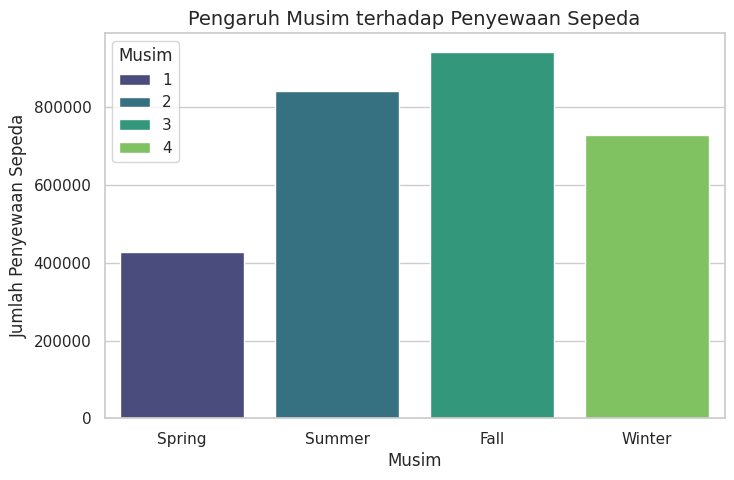

In [134]:
season_df = all_df.groupby("season", observed=True)["cnt_x"].sum().reset_index()

# Agregasi jumlah penyewaan berdasarkan musim
season_df = all_df.groupby("season", observed=True).agg({
    "cnt_x": "sum"
}).reset_index()

# Ubah nama kolom agar lebih mudah dipahami
season_df.rename(columns={"cnt_x": "total_rentals"}, inplace=True)

# Cek hasil agregasi
print(season_df.head())

# Membuat bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=season_df, x="season", y="total_rentals", hue="season", palette="viridis")

plt.title("Pengaruh Musim terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(title="Musim")
plt.show()

**Insight:**
- Jika jumlah penyewaan tertinggi terjadi pada musim panas atau gugur, ini menunjukkan bahwa orang lebih sering menggunakan sepeda saat cuaca lebih bersahabat.
- Jika jumlah penyewaan turun di musim dingin, bisa jadi karena kondisi cuaca yang kurang mendukung, seperti hujan atau salju.
- Informasi ini dapat membantu dalam strategi bisnis, seperti meningkatkan promosi penyewaan pada musim ramai atau menyediakan lebih banyak sepeda saat permintaan tinggi.

### Pertanyaan 2: Bagaimana tren penggunaan sepeda pada hari kerja dibandingkan akhir pekan?

   workingday  total_rentals
0           0         895837
1           1        2046016


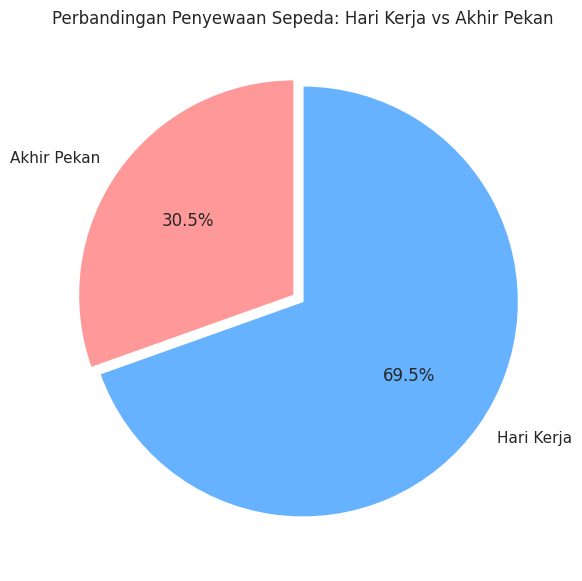

In [135]:
workingday_df = all_df.groupby("workingday", observed=True)["cnt_x"].sum().reset_index()

# Agregasi jumlah penyewaan berdasarkan hari kerja vs akhir pekan
workingday_df = all_df.groupby("workingday", observed=True).agg({
    "cnt_x": "sum"
}).reset_index()

# Ubah nama kolom agar lebih mudah dipahami
workingday_df.rename(columns={"cnt_x": "total_rentals"}, inplace=True)

# Cek hasil agregasi
print(workingday_df.head())

# Membuat pie chart dengan nama kolom yang benar
plt.figure(figsize=(7,7))
plt.pie(
    workingday_df["total_rentals"],  # Menggunakan 'total_rentals' yang sudah diubah namanya
    labels=["Akhir Pekan", "Hari Kerja"],
    autopct="%1.1f%%",
    colors=["#FF9999", "#66B2FF"],
    startangle=90,
    explode=[0.05, 0]
)
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
- Jika penyewaan lebih tinggi pada hari kerja, ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan transportasi sehari-hari (misalnya berangkat kerja atau sekolah).
- Jika penyewaan meningkat saat akhir pekan, kemungkinan besar sepeda digunakan untuk rekreasi atau aktivitas santai.
- Informasi ini penting untuk perencanaan bisnis, seperti menyesuaikan jumlah sepeda yang tersedia berdasarkan tren penggunaan harian.

### Pertanyaan 3: Jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari?

   hour  avg_rentals  total_rentals
0     0    54.124590          33016
1     1    33.569052          20175
2     2    23.178819          13351
3     3    11.867958           6741
4     4     6.223549           3647


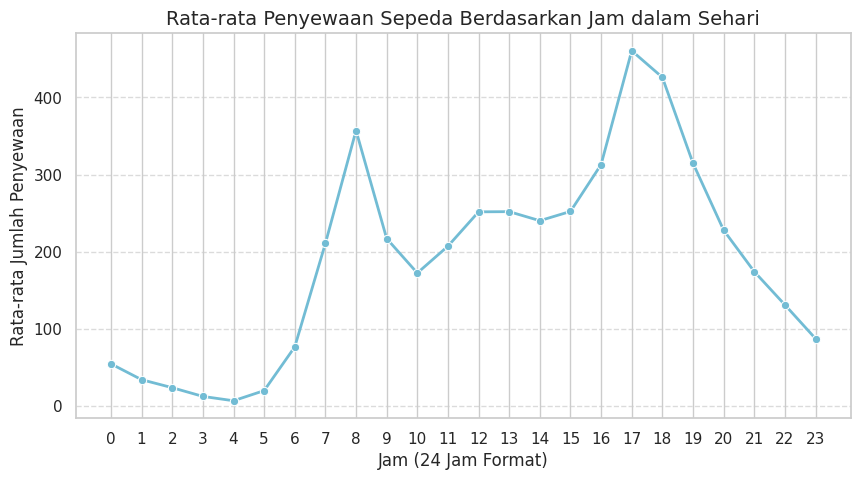

In [136]:
hourly_df = all_df.groupby("hr")["cnt_x"].mean().reset_index()

# Agregasi jumlah penyewaan berdasarkan jam
hourly_df = all_df.groupby("hr").agg({
    "cnt_x": ["mean", "sum"]
}).reset_index()

# Ubah nama kolom agar lebih mudah dipahami
hourly_df.columns = ["hour", "avg_rentals", "total_rentals"]

# Cek hasil agregasi
print(hourly_df.head())

# Membuat line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_df, x="hour", y="avg_rentals", marker="o", color="#72BCD4", linewidth=2)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam (24 Jam Format)")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(range(0, 24, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Jika terlihat dua puncak utama di sekitar pagi (07:00 - 09:00) dan sore (17:00 - 19:00), ini menunjukkan bahwa sepeda lebih sering digunakan saat jam kerja (misalnya untuk perjalanan ke/dari kantor atau sekolah).
- Jika puncak penyewaan lebih tinggi di siang atau malam hari, ini mungkin menunjukkan penggunaan rekreasional atau aktivitas santai.
- Jam dengan penyewaan terendah bisa menjadi waktu ideal untuk perawatan atau pengisian ulang sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 <br>Berdasarkan hasil, jumlah penyewaan sepeda bervariasi tergantung musim. Musim gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas, menunjukkan bahwa cuaca hangat mendorong lebih banyak orang untuk bersepeda. Sebaliknya, musim dingin memiliki jumlah penyewaan yang lebih rendah, kemungkinan karena suhu yang dingin membuat orang enggan bersepeda. Musim semi memiliki jumlah penyewaan terendah, yang mungkin disebabkan oleh cuaca yang lebih tidak stabil. Hal ini menunjukkan bahwa faktor musim sangat memengaruhi kebiasaan bersepeda masyarakat.<br><br>

- Conclution pertanyaan 2 <br> Dari hasil, terlihat bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan akhir pekan. Sekitar 67,7% penyewaan terjadi pada hari kerja, sementara hanya 32,3% pada akhir pekan. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama untuk bekerja atau bersekolah, bukan hanya untuk rekreasi. Dengan kata lain, tren penggunaan sepeda menunjukkan bahwa banyak orang memanfaatkan layanan ini untuk kebutuhan mobilitas sehari-hari. <br><br>

- Conclution pertanyaan 3 <br> Hasil terhadap pola penyewaan per jam menunjukkan bahwa jumlah penyewaan sepeda mencapai puncaknya pada pukul 08.00 pagi dan antara pukul 17.00 hingga 18.00 sore. Pola ini mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan pergi dan pulang kerja atau sekolah. Di luar jam-jam sibuk tersebut, jumlah penyewaan cenderung menurun, terutama pada tengah malam hingga subuh. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rutin sehari-hari dibandingkan dengan keperluan rekreasi yang lebih fleksibel waktunya.

In [137]:
all_df.to_csv("all_data.csv", index=False)